In [1]:
# Step 1: Data Loading
import pandas as pd

# Load the KDD Cup dataset
data_path = "kddcup.data_10_percent.csv"
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
    "num_failed_logins", "logged_in", "num_compromised", "root_shell",
    "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "class",
]

df = pd.read_csv(data_path, names=columns)
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features

categorical_columns = ["protocol_type", "service", "flag", "class"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import numpy as np
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5)
}


In [5]:
best_model = None
best_accuracy = 0

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy*100}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

C:\Users\dipsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 94.68245534132888
Decision Tree Accuracy: 99.94737108445929
Random Forest Accuracy: 99.97064925864075
XGBoost Accuracy: 99.97672182581853
KNN Classifier Accuracy: 99.847173726026


In [6]:
#### Step 3: Feature Selection using the Best Model
# In this example, we'll select the model with the highest accuracy as the best model for feature selection.
selected_model_name = [name for name, model in models.items() if model == best_model][0]
selected_model = models[selected_model_name]
selected_feature_indices = selected_model.feature_importances_.argsort()[::-1][:10]  # Select top 10 important features

X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Step 4: Train the Best Model on the Selected Features
selected_model.fit(X_train_selected, y_train)
y_pred_selected = selected_model.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Selected Model ({best_model}) Accuracy: {accuracy_selected}")

Selected Model (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)) Accuracy: 0.9966904508881129


In [ ]:
categorical_columns = ["protocol_type", "service", "flag"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

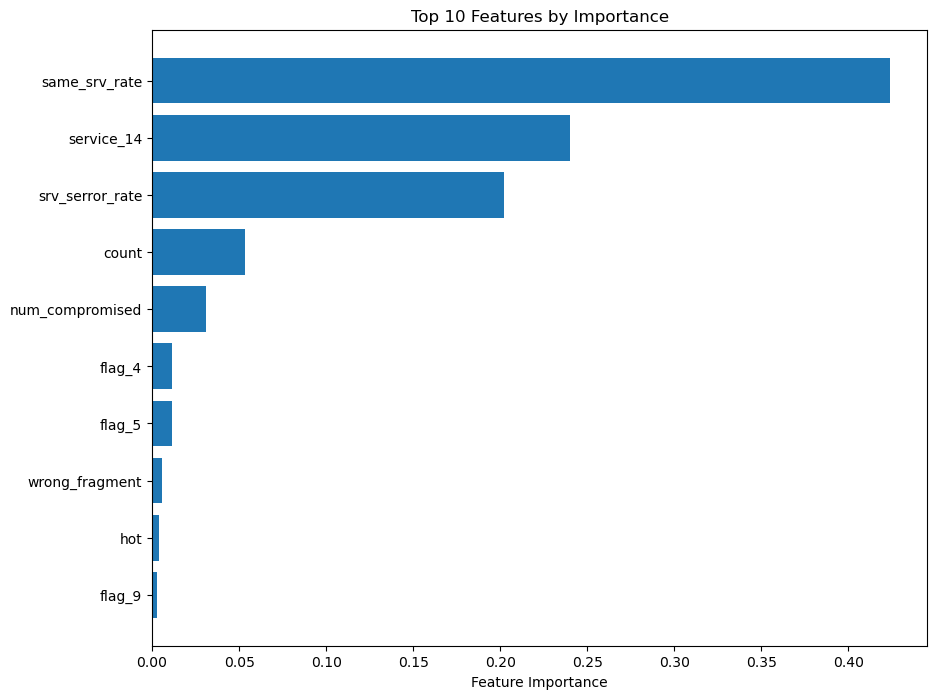

Feature Importance Analysis:
            Feature  Importance
25    same_srv_rate    0.423971
53       service_14    0.240029
22  srv_serror_rate    0.202312
19            count    0.053586
9   num_compromised    0.031005
..              ...         ...
76       service_37    0.000000
77       service_38    0.000000
43        service_4    0.000000
80       service_41    0.000000
74       service_35    0.000000

[115 rows x 2 columns]


In [8]:
import matplotlib.pyplot as plt

# Perform feature importance analysis
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to hold feature importance values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features by Importance')
plt.gca().invert_yaxis()
plt.show()

# Display the entire feature importance DataFrame
print("Feature Importance Analysis:")
print(feature_importance_df)

In [9]:
model = XGBClassifier()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Create a StratifiedKFold instance for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV instance using stratified cross-validation
grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, n_jobs=-1)


In [ ]:
# Assuming input_data is a dictionary with the same features as the trained model
input_data = {
    "duration": 0,
    "protocol_type": 1,  # Replace with the appropriate encoded value (e.g., 1 for TCP)
    "service": 2,       # Replace with the appropriate encoded value
    "flag": 3,          # Replace with the appropriate encoded value
    "src_bytes": 0,
    "dst_bytes": 0,
    "land": 0,
    "wrong_fragment": 0,
    "urgent": 0,
    "hot": 0,
    "num_failed_logins": 0,
    "logged_in": 0,
    "num_compromised": 0,
    "root_shell": 0,
    "su_attempted": 0,
    "num_root": 0,
    "num_file_creations": 0,
    "num_shells": 0,
    "num_access_files": 0,
    "num_outbound_cmds": 0,
    "is_host_login": 0,
    "is_guest_login": 0,
    "count": 0,
    "srv_count": 0,
    "serror_rate": 0,
    "srv_serror_rate": 0,
    "rerror_rate": 0,
    "srv_rerror_rate": 0,
    "same_srv_rate": 0,
    "diff_srv_rate": 0,
    "srv_diff_host_rate": 0,
    "dst_host_count": 0,
    "dst_host_srv_count": 0,
    "dst_host_same_srv_rate": 0,
    "dst_host_diff_srv_rate": 0,
    "dst_host_same_src_port_rate": 0,
    "dst_host_srv_diff_host_rate": 0,
    "dst_host_serror_rate": 0,
    "dst_host_srv_serror_rate": 0,
    "dst_host_rerror_rate": 0,
    "dst_host_srv_rerror_rate": 0
}

# Convert the input data dictionary into a DataFrame
input_df = pd.DataFrame(input_data, index=[0])

# Encode categorical features with one-hot encoding (if not done before)
input_df = pd.get_dummies(input_df, columns=categorical_columns, drop_first=True)

# Standardize numerical features using the same scaler as before
input_df[numerical_features] = scaler.transform(input_df[numerical_features])

# Use the trained XGBoost model to make predictions
predicted_class = xgb_model.predict(input_df)

# Decode the predicted class (if needed)
# Decode the predicted class (if needed)
le = LabelEncoder()
le.fit(df['class'])
predicted_class = le.inverse_transform(predicted_class)

print("Predicted Class:", predicted_class)
